<h1 align="center">Module 4 Assessment</h1>

## Overview

This assessment is designed to test your understanding of the Mod 4 material. It covers:

* Calculus, Cost Function, and Gradient Descent
* Extensions to Linear Models
* Introduction to Linear Regression
* Working with Time Series Data


Read the instructions carefully. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions

For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, do your best to communicate yourself clearly.

---
## Calculus, Cost Function, and Gradient Descent
---

![best fit line](visuals/best_fit_line.png)

The best fit line that goes through the scatterplot up above can be generalized in the following equation: $$y = mx + b$$

Of all the possible lines, we can prove why that particular line was chosen using the plot down below:

![](visuals/cost_curve.png)

where RSS is defined as the residual sum of squares:

$$ 
\begin{align}
RSS &= \sum_{i=1}^n(actual - expected)^2 \\
&= \sum_{i=1}^n(y_i - \hat{y})^2 \\
&= \sum_{i=1}^n(y_i - (mx_i + b))^2
\end{align}
$$ 

### 1. What is a more generalized name for the RSS curve above? How is it related to machine learning models?

// your answer here //

### 2. Would you rather choose a $m$ value of 0.08 or 0.03 from the curve up above? In your answer, also explain what it means to move along the curve in relation to the best fit line with respect to $m$. 

// your answer here //

![](visuals/gd.png)

### 3. Using the gradient descent visual from above, explain why the distance between each step is getting smaller as more steps occur with gradient descent.

// your answer here //

### 4. What is the purpose of a learning rate in gradient descent? Explain how a very small and a very large learning rate would affect the gradient descent.

// your answer here //

---
## Extensions to Linear Regression
---

In this section, you're going to be creating linear models that are more complicated than a simple linear regression. In the cells below, we are importing relevant modules that you might need later on. We also load and prepare the dataset for you.

In [ ]:
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso, Ridge
import pickle
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [1]:
# __SOLUTION__ 
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso, Ridge
import pickle
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('raw_data/advertising.csv').drop('Unnamed: 0',axis=1)
data.describe()

In [2]:
# __SOLUTION__ 
data = pd.read_csv('raw_data/advertising.csv').drop('Unnamed: 0',axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
X = data.drop('sales', axis=1)
y = data['sales']

In [3]:
# __SOLUTION__ 
X = data.drop('sales', axis=1)
y = data['sales']

In [ ]:
# split the data into training and testing set. Do not change the random state please!
X_train , X_test, y_train, y_test = train_test_split(X, y,random_state=2019)

In [4]:
# __SOLUTION__ 
# split the data into training and testing set. Do not change the random state please!
X_train , X_test, y_train, y_test = train_test_split(X, y,random_state=2019)

### 1. We'd like to add a bit of complexity to the model created in the example above, and we will do it by adding some polynomial terms. Write a Function to calculate train and test error for different polynomial degrees ranging from (1-10).

This function should:
* take `poly_degree` as a parameter that will be used to create all different possible polynomial degrees starting at 1 UP TO and including poly_degree
* create a PolynomialFeatures object for each degree and fit a linear regression model using the transformed data
* calculate the root mean square error for each level of polynomial
* return two lists that contain the `train_errors` and `test_errors` 


In [ ]:
def calc_degree(poly_degree):
    """Calculate train and test error for different polynomial degree (1-10)"""
    train_error_list = []
    test_error_list = []
    # // your code here //
    return train_error_list, test_error_list

In [5]:
# __SOLUTION__ 
# SOLUTION
def calc_degree(poly_degree):
    """Calculate train and test error for different polynomial degree (1-9)"""
    train_error_list = []
    test_error_list = []
    for i in range(1, poly_degree + 1):
        poly = PolynomialFeatures(degree=i, interaction_only=False)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        lr_poly = LinearRegression()
        lr_poly.fit(X_poly_train,y_train)

        train_error = np.sqrt(mean_squared_error(y_train, lr_poly.predict(X_poly_train)))
        test_error = np.sqrt(mean_squared_error(y_test, lr_poly.predict(X_poly_test)))
        train_error_list.append(train_error)
        test_error_list.append(test_error)

    return train_error_list, test_error_list

In [ ]:
error_train, error_test = calc_degree(10)

In [6]:
# __SOLUTION__ 
error_train, error_test = calc_degree(10)

#error_train = [1.633049529710119,
 0.6544219763525787,
 0.4923003895833528,
 0.42636966692892925,
 0.2552375092236587,
 0.21455738787043777,
 0.17677574592197967,
 0.20526596216126342,
 0.26914830727034605,
 0.28892220322372025]
#error_test = [1.8399932733741966,
 0.4317931087085349,
 0.39091400558118194,
 1.3972328447228304,
 2.381671115675543,
 4.672887984282909,
 5.391079429485139,
 88.12110401687424,
 24002.511402029148,
 177660.21087344288]

### 2. What is the optimal number of degrees for our polynomial features in this model? In general, how does increasing the polynomial degree relate to the Bias/Variance tradeoff? 

<img src ="visuals/rsme_poly_2.png" width = "600">

<!---
fig, ax = plt.subplots(figsize=(7, 7))
degree = list(range(1, 10 + 1))
ax.plot(degree, error_train[0:len(degree)], "-", label="Train Error")
ax.plot(degree, error_test[0:len(degree)], "-", label="Test Error")
ax.set_yscale("log")
ax.set_xlabel("Polynomial Feature Degree")
ax.set_ylabel("Root Mean Squared Error")
ax.legend()
ax.set_title("Relationship Between Degree and Error")
fig.tight_layout()
fig.savefig("visuals/rsme_poly.png",
            dpi=150,
            bbox_inches="tight")
--->

// your answer here //

### 3. In general what methods would you can use to reduce overfitting and underfitting? Provide an example for both and explain how each technique works to reduce the problems of underfitting and overfitting.

// your answer here //

### 4. Create the function `train_regularizer` below to train a regularized model and obtain the the testing error. You can use a regularization technique of your choosing.

We've taken care to load the polynomial transformed data for you, held in X_poly_train and X_poly_test. 

The function should:
* take in X_train, X_test, y_train, y_test as parameters. We are assuming that the data has already been transformed into a polynomial ^ 10
* return the root mean square error of the predictions for the test data
> Hint: Make sure to include all necessary preprocessing steps required when fitting a regularized model!

<!---
poly = PolynomialFeatures(degree=10, interaction_only=False, include_bias=False)
X_poly_train = poly.fit_transform(X_train) 
X_poly_test = poly.transform(X_test)
pickle.dump(X_poly_train, open("write_data/poly_train_model.pkl", "wb"))
pickle.dump(X_poly_test, open("write_data/poly_test_model.pkl", "wb"))
--->

In [ ]:
X_poly_train = pickle.load(open("write_data/poly_train_model.pkl", "rb"))
X_poly_test = pickle.load(open("write_data/poly_test_model.pkl", "rb"))

def train_regularizer(X_train, X_test, y_train, y_test):
    # // your code here //
    pass

In [7]:
# __SOLUTION__ 
X_poly_train = pickle.load(open("write_data/poly_train_model.pkl", "rb"))
X_poly_test = pickle.load(open("write_data/poly_test_model.pkl", "rb"))

def train_regularizer(X_train, X_test, y_train, y_test):
    std = StandardScaler()
    X_train_transformed = std.fit_transform(X_poly_train)
    X_test_transformed = std.transform(X_poly_test)
    lasso = Lasso()
    lasso.fit(X_train_transformed,y_train)
    y_pred = lasso.predict(X_test_transformed)
    return np.sqrt(mean_squared_error(y_test,y_pred))

---
## Introduction to Logistic Regression
---

<!---
# load data
ads_df = pd.read_csv("raw_data/social_network_ads.csv")

# one hot encode categorical feature
def is_female(x):
    """Returns 1 if Female; else 0"""
    if x == "Female":
        return 1
    else:
        return 0
        
ads_df["Female"] = ads_df["Gender"].apply(is_female)
ads_df.drop(["User ID", "Gender"], axis=1, inplace=True)
ads_df.head()

# separate features and target
X = ads_df.drop("Purchased", axis=1)
y = ads_df["Purchased"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

# preprocessing
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# save preprocessed train/test split objects
pickle.dump(X_train, open("write_data/social_network_ads/X_train_scaled.pkl", "wb"))
pickle.dump(X_test, open("write_data/social_network_ads/X_test_scaled.pkl", "wb"))
pickle.dump(y_train, open("write_data/social_network_ads/y_train.pkl", "wb"))
pickle.dump(y_test, open("write_data/social_network_ads/y_test.pkl", "wb"))

# build model
model = LogisticRegression(C=1e5, solver="lbfgs")
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

from sklearn.metrics import confusion_matrix

# create confusion matrix
# tn, fp, fn, tp
cnf_matrix = confusion_matrix(y_test, y_test_pred)
cnf_matrix

# build confusion matrix plot
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

# Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate Axis Scales
class_names = set(y_test) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

# Add a Side Bar Legend Showing Colors
plt.colorbar()

# Add padding
plt.tight_layout()
plt.savefig("visuals/cnf_matrix.png",
            dpi=150,
            bbox_inches="tight")
--->

![cnf matrix](visuals/cnf_matrix.png)

### 1. Using the confusion matrix up above, calculate precision, recall, and F-1 score.

In [ ]:
# // your code here //

In [8]:
# __SOLUTION__ 
precision = 30/(30+4)
recall = 30 / (30 + 12)
F1 = 2 * (precision * recall) / (precision + recall)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("F1: {}".format(F1))

precision: 0.8823529411764706
recall: 0.7142857142857143
F1: 0.7894736842105262


### 2.  What is a real life example of when you would care more about recall than precision? Make sure to include information about errors in your explanation.

// your answer here //

<!---
# save preprocessed train/test split objects
X_train = pickle.load(open("write_data/social_network_ads/X_train_scaled.pkl", "rb"))
X_test = pickle.load(open("write_data/social_network_ads/X_test_scaled.pkl", "rb"))
y_train = pickle.load(open("write_data/social_network_ads/y_train.pkl", "rb"))
y_test = pickle.load(open("write_data/social_network_ads/y_test.pkl", "rb"))

# build model
model = LogisticRegression(C=1e5, solver="lbfgs")
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

labels = ["Age", "Estimated Salary", "Female", "All Features"]
colors = sns.color_palette("Set2")
plt.figure(figsize=(10, 8))
# add one ROC curve per feature
for feature in range(3):
    # female feature is one hot encoded so it produces an ROC point rather than a curve
    # for this reason, female will not be included in the plot at all since it is
    # disingeneuous to call it a curve.
    if feature == 2:
        pass
    else:
        X_train_feat = X_train[:, feature].reshape(-1, 1)
        X_test_feat = X_test[:, feature].reshape(-1, 1)
        logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='lbfgs')
        model_log = logreg.fit(X_train_feat, y_train)
        y_score = model_log.decision_function(X_test_feat)
        fpr, tpr, thresholds = roc_curve(y_test, y_score)
        lw = 2
        plt.plot(fpr, tpr, color=colors[feature],
                 lw=lw, label=labels[feature])

# add one ROC curve with all the features
model_log = logreg.fit(X_train, y_train)
y_score = model_log.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
lw = 2
plt.plot(fpr, tpr, color=colors[3], lw=lw, label=labels[3])

# create foundation of the plot
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("visuals/many_roc.png",
            dpi=150,
            bbox_inches="tight")
--->

### 3. Pick the best ROC curve from this graph and explain your choice. 

*Note: each ROC curve represents one model, each labeled with the feature(s) inside each model*.

<img src = "visuals/many_roc.png" width = "700">


// your answer here //

<!---
# sorting by 'Purchased' and then dropping the last 130 records
dropped_df = ads_df.sort_values(by="Purchased")[:-130]
dropped_df.reset_index(inplace=True)
pickle.dump(dropped_df, open("write_data/sample_network_data.pkl", "wb"))
--->

In [ ]:
network_df = pickle.load(open("write_data/sample_network_data.pkl", "rb"))

# partion features and target 
X = network_df.drop("Purchased", axis=1)
y = network_df["Purchased"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver="lbfgs")
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f"The original classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.")

# get the area under the curve from an ROC curve
y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
print(f"The original classifier has an area under the ROC curve of {auc}.")

In [9]:
# __SOLUTION__ 
network_df = pickle.load(open("write_data/sample_network_data.pkl", "rb"))

# partion features and target 
X = network_df.drop("Purchased", axis=1)
y = network_df["Purchased"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

# scale features
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# build classifier
model = LogisticRegression(C=1e5, solver="lbfgs")
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

# get the accuracy score
print(f"The original classifier has an accuracy score of {round(accuracy_score(y_test, y_test_pred), 3)}.")

# get the area under the curve from an ROC curve
y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
auc = round(roc_auc_score(y_test, y_score), 3)
print(f"The original classifier has an area under the ROC curve of {auc}.")

The original classifier has an accuracy score of 0.956.
The original classifier has an area under the ROC curve of 0.836.


/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/forest.polchow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


### 4. The model above has an accuracy score that might be too good to believe. Using `y.value_counts()`, explain how `y` is affecting the accuracy score.

In [ ]:
y.value_counts()

In [10]:
# __SOLUTION__ 
y.value_counts()

0    257
1     13
Name: Purchased, dtype: int64

// your answer here //

### 5. Update the inputs in the classification model using a technique to address the issues mentioned up above in question 4. Make sure to use a Logistic Regression model as your classifier.

Be sure to include updates regarding:
* the accuracy score; and
* the area under the curve (AUC)

In [ ]:
# // your code here //

# print accuracy
score_update = None
print(f"The updated classifier has an accuracy score of {score_update}.")

# print auc
auc_update = None
print(f"The updated classifier has an area under the ROC curve of {auc_update}.")

The updated classifier has an accuracy score of 0.868.
The updated classifier has an area under the ROC curve of 0.9179487179487179.


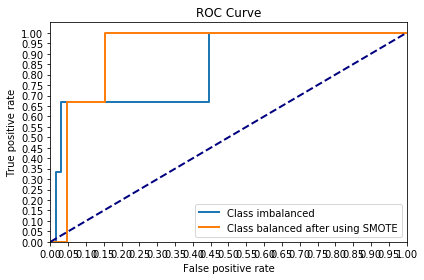

In [11]:
# __SOLUTION__ 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2019)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
model_smote = LogisticRegression(C=1e5, solver="lbfgs")
model_smote.fit(X_train_resampled, y_train_resampled)
y_test_pred_smote = model_smote.predict(X_test)
y_train_pred_smote = model_smote.predict(X_train_resampled)

# assess accuracy
score_smote = round(accuracy_score(y_test, y_test_pred_smote), 3)
print(f"The updated classifier has an accuracy score of {score_smote}.")

y_score_smote = model_smote.decision_function(X_test)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_score_smote)
auc_smote = roc_auc_score(y_test, y_score_smote)
print(f"The updated classifier has an area under the ROC curve of {auc_smote}.")

lw = 2
plt.plot(fpr, tpr,
         lw=lw, label="Class imbalanced")
plt.plot(fpr_smote, tpr_smote,
         lw=lw, label="Class balanced after using SMOTE")
# create foundation of the plot
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i / 20.0 for i in range(21)])
plt.xticks([i / 20.0 for i in range(21)])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()

---
## Time Series
---

<!---Create stock_df and save as .pkl
stocks_df = pd.read_csv("raw_data/all_stocks_5yr.csv")
stocks_df["clean_date"] = pd.to_datetime(stocks_df["date"], format="%Y-%m-%d")
stocks_df.drop(["date", "clean_date", "volume", "Name"], axis=1, inplace=True)
stocks_df.rename(columns={"string_date": "date"}, inplace=True)
pickle.dump(stocks_df, open("write_data/all_stocks_5yr.pkl", "wb"))
--->

In [ ]:
stocks_df = pickle.load(open("write_data/all_stocks_5yr.pkl", "rb"))
stocks_df.head()

In [12]:
# __SOLUTION__ 
stocks_df = pickle.load(open("write_data/all_stocks_5yr.pkl", "rb"))
stocks_df.head()

,open,high,low,close,date
0,15.07,15.12,14.63,14.75,"February 08, 2013"
1,14.89,15.01,14.26,14.46,"February 11, 2013"
2,14.45,14.51,14.10,14.27,"February 12, 2013"
3,14.30,14.94,14.25,14.66,"February 13, 2013"
4,14.94,14.96,13.16,13.99,"February 14, 2013"


### 1. Transform the `date` feature so that it becomes a `datetime` object that contains the following format: YYYY-MM-DD and set `date` to be the index of `stocks_df`.

In [ ]:
# // your code here //

In [13]:
# __SOLUTION__ 
stocks_df["date"] = pd.to_datetime(stocks_df["date"], format="%B %d, %Y")
stocks_df.set_index(keys="date", inplace=True)
stocks_df.head()

,open,high,low,close
date,,,,
2013-02-08,15.07,15.12,14.63,14.75
2013-02-11,14.89,15.01,14.26,14.46
2013-02-12,14.45,14.51,14.10,14.27
2013-02-13,14.30,14.94,14.25,14.66
2013-02-14,14.94,14.96,13.16,13.99


### 2. Perform monthly upsampling on `stocks_df` that takes the mean of the `open`, `high`, `low`, and `close` features on a monthly basis. Store the results in `stocks_monthly_df`.

> Hint: `stocks_monthly_df` should have 61 rows and 4 columns after you perform upsampling.

In [ ]:
# // your code here //

In [14]:
# __SOLUTION__ 
stocks_monthly = stocks_df.resample("MS")
stocks_monthly_df = stocks_monthly.mean()
stocks_monthly_df.head()

,open,high,low,close
date,,,,
2013-02-01,58.135082,58.656064,57.600095,58.106483
2013-03-01,59.430461,59.924352,58.986414,59.531515
2013-04-01,60.261989,60.829809,59.653234,60.294833
2013-05-01,63.189973,63.854413,62.681440,63.284582
2013-06-01,62.080930,62.672076,61.373427,61.994978


### 3. Create a line graph that visualizes the monthly open stock prices from `stocks_monthly_df` for the purposes of identifying if average monthly open stock price is stationary or not using the rolling mean and rolling standard deviation.

> Hint: 
> * store your sliced version of `stocks_monthly_df` in a new DataFrame called `open_monthly_df`;
> * use a window size of 3 to represent one quarter of time in a year

In [15]:
# __SOLUTION__ 
stocks_monthly_df.shape

(61, 4)

In [ ]:
# // your code here //

open_monthly_df = None

rolmean = None
rolstd = None

# note: do not rename the objects otherwise the plot code will not work
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(open_monthly_df, color="blue",label="Average monthly opening stock price")
ax.plot(rolmean, color="red", label="Rolling quarterly mean")
ax.plot(rolstd, color="black", label="Rolling quarterly std. deviation")
ax.set_ylim(0, 120)
ax.legend()
fig.suptitle("Average monthly open stock prices, Feb. 2013 to Feb. 2018")
fig.tight_layout()

// your answer here //

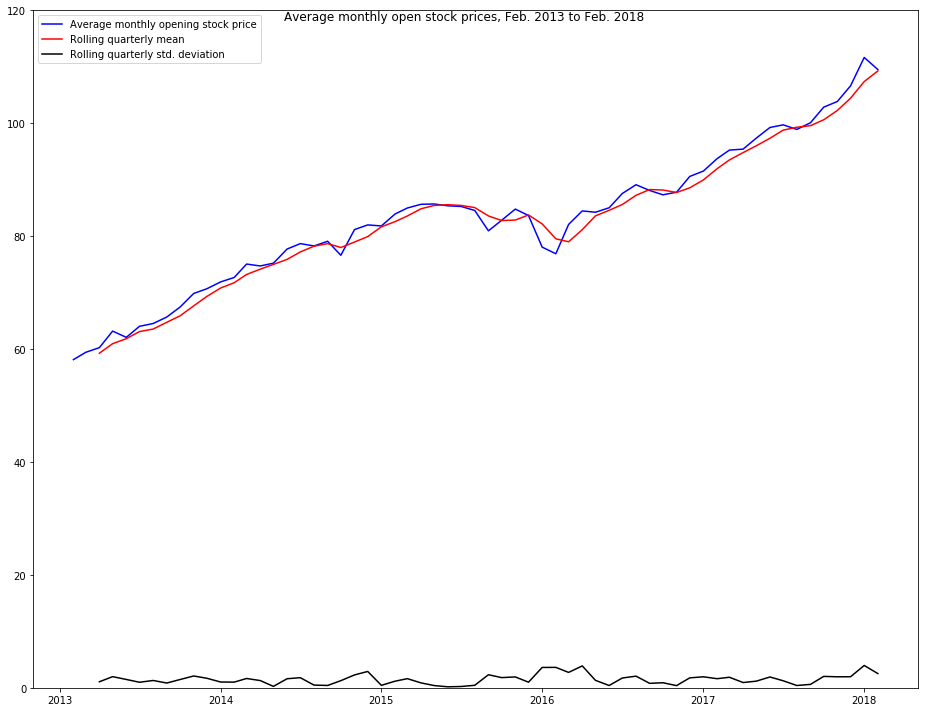

In [16]:
# __SOLUTION__ 
open_monthly_df = stocks_monthly_df.loc[:, "open"]

rolmean = open_monthly_df.rolling(window=3, center=False).mean()
rolstd = open_monthly_df.rolling(window=3, center=False).std()

fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(open_monthly_df, color="blue",label="Average monthly opening stock price")
ax.plot(rolmean, color="red", label="Rolling quarterly mean")
ax.plot(rolstd, color="black", label="Rolling quarterly std. deviation")
ax.set_ylim(0, 120)
ax.legend()
fig.suptitle("Average monthly open stock prices, Feb. 2013 to Feb. 2018")
fig.tight_layout()

### 4. Use the Dickey-Fuller Test to identify if `open_monthly_df` is stationary. Does this confirm your answer from Question 3? Explain why the time series is stationary or not based on the output from the Dickey-Fuller Test.

In [ ]:
# // your code here

// your answer here //

In [17]:
# __SOLUTION__ 
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(open_monthly_df)

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

print ('Results of Dickey-Fuller Test:')
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.173154
p-value                         0.941647
#Lags Used                      2.000000
Number of Observations Used    58.000000
dtype: float64


### 5. Looking at the decomposition of the time series in `open_monthly_df`, it looks like the peaks are the same value. To confirm or deny this, create a function that returns a dictionary where each key is year and each values is the maximum value from the `seasonal` object for each year.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(open_monthly_df))

# Gather the trend, seasonality and noise of decomposed object
seasonal = decomposition.seasonal

# Plot gathered statistics
plt.figure(figsize=(13, 10))
plt.plot(seasonal,label='Seasonality', color="blue")
plt.title("Seasonality of average monthly open stock prices, Feb. 2013 to Feb. 2018")
plt.ylabel("Average monthly open stock prices")
plt.tight_layout()
plt.show()

In [ ]:
def calc_yearly_max(seasonal_series):
    """Returns the max seasonal value for each year"""
    # // your code here //
    pass

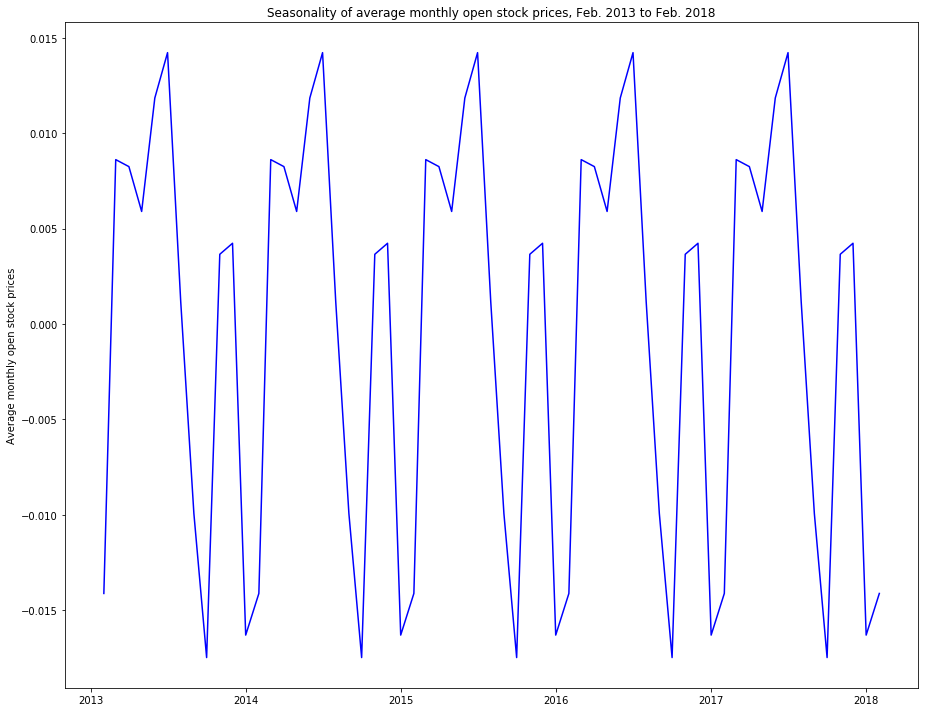

In [18]:
# __SOLUTION__ 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(open_monthly_df))

# Gather the trend, seasonality and noise of decomposed object
seasonal = decomposition.seasonal

# Plot gathered statistics
plt.figure(figsize=(13, 10))
plt.plot(seasonal,label='Seasonality', color="blue")
plt.title("Seasonality of average monthly open stock prices, Feb. 2013 to Feb. 2018")
plt.ylabel("Average monthly open stock prices")
plt.tight_layout()
plt.show()

In [ ]:
calc_yearly_max(seasonal)

In [19]:
# __SOLUTION__ 
def calc_yearly_max(seasonal_series):
    """Returns the max seasonal value for each year"""
    output = {}
    for year in seasonal.index.year.unique():
        year_str = str(year)
        output[year_str] = seasonal[year_str].max()
    return output

In [20]:
# __SOLUTION__ 
calc_yearly_max(seasonal)

{'2013': 0.014216997626629509,
 '2014': 0.014216997626629509,
 '2015': 0.014216997626629509,
 '2016': 0.014216997626629509,
 '2017': 0.014216997626629509,
 '2018': -0.014125924404344152}

In [ ]:
# __SOLUTION__ 
